In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dataset=pd.read_csv("dataset.csv")

In [11]:

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [12]:
dataset['Date']=le.fit_transform(dataset['Date'])

In [15]:
dataset.tail(10)

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
1429,Friday,9,5,135,18,25,4
1430,Friday,9,5,136,31,8,2
1431,Friday,9,5,137,13,11,4
1432,Friday,9,5,138,34,15,1
1433,Friday,9,5,139,5,43,4
1434,Friday,9,5,140,47,38,1
1435,Friday,9,5,141,15,8,4
1436,Friday,9,5,142,26,38,1
1437,Friday,9,5,143,16,34,3
1438,Friday,9,5,144,16,17,1


In [25]:
df=dataset
df

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,0,3,2,35,17,2
1,Wednesday,0,3,3,36,16,3
2,Wednesday,0,3,4,27,25,5
3,Wednesday,0,3,5,23,23,3
4,Wednesday,0,3,6,18,42,2
...,...,...,...,...,...,...,...
1434,Friday,9,5,140,47,38,1
1435,Friday,9,5,141,15,8,4
1436,Friday,9,5,142,26,38,1
1437,Friday,9,5,143,16,34,3


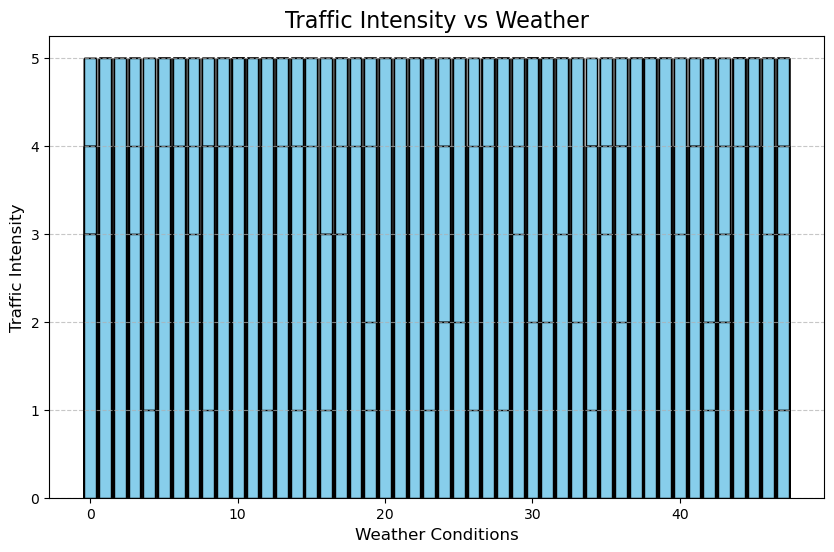

In [35]:
import matplotlib.pyplot as plt

# Plotting a basic bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['Weather'], df['Traffic'], color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Traffic Intensity vs Weather', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Traffic Intensity', fontsize=12)

# Adding a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


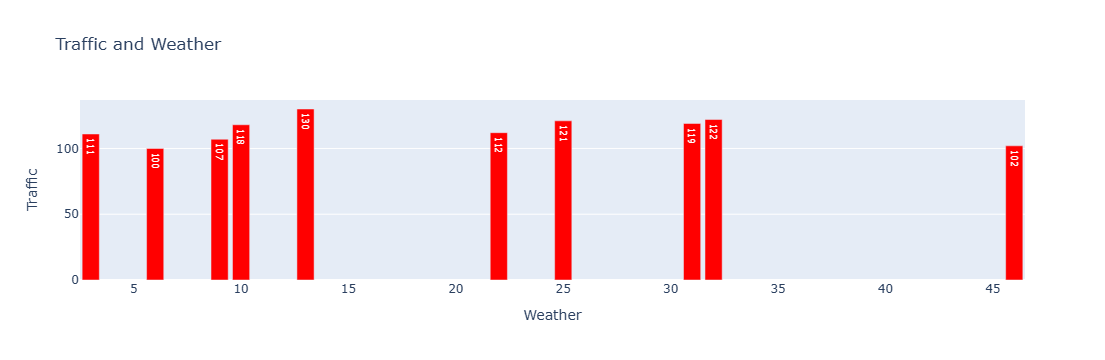

In [53]:
import plotly.graph_objects as go
item_popularity=df.groupby('Weather')['Traffic'].sum().sort_values(ascending=False)
top=10
fig=go.Figure()
fig.add_trace(go.Bar(x=item_popularity.index[:top],y=item_popularity.values[:top],text=item_popularity.values[:top],textposition="auto",marker=dict(color="red")))
fig.update_layout(title="Traffic and Weather",xaxis_title='Weather',yaxis_title="Traffic")
fig.show()

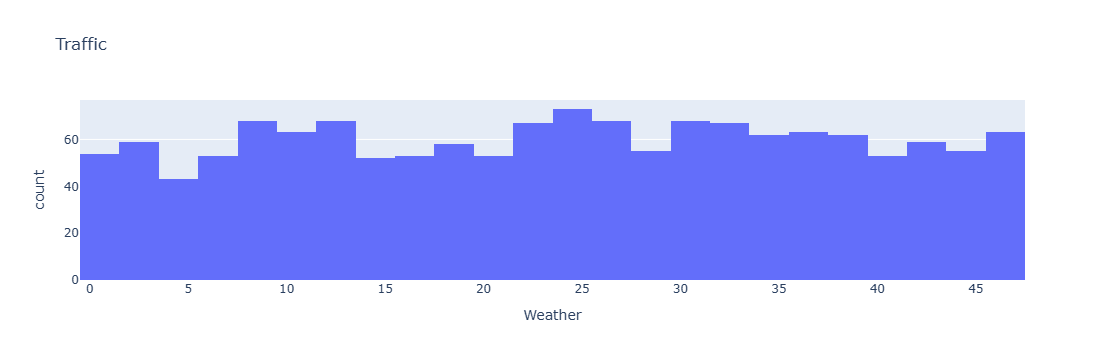

In [49]:
import plotly.express as px
fig=px.histogram(dataset,x="Weather",title="Traffic")
fig.show()

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          1439 non-null   object
 1   Date         1439 non-null   int32 
 2   CodedDay     1439 non-null   int64 
 3   Zone         1439 non-null   int64 
 4   Weather      1439 non-null   int64 
 5   Temperature  1439 non-null   int64 
 6   Traffic      1439 non-null   int64 
dtypes: int32(1), int64(5), object(1)
memory usage: 73.2+ KB


In [12]:
X=dataset.iloc[:,2:6].values
y=dataset.iloc[:,6:7].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(X_train,y_train)


C:\Users\Asus TUF\anaconda3.0\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=300, random_state=0)

In [25]:
y_pred=regressor.predict(X_test)
y_pred

array([3.16      , 2.94666667, 2.90666667, ..., 2.45666667, 3.19      ,
       2.77      ])

In [28]:
if(y_pred.all()<2.5):
    y_pred=np.round(y_pred-0.5)
else:
    y_pred=np.round(y_pred+0.5)
y_pred

array([3., 2., 2., ..., 2., 3., 2.])

In [32]:
df1=(y_pred-y_test)/y_test
df1=round(df1.mean()*100,2)
print("Error=",df1,"%")

Error= 15.97 %


In [34]:
a=100-df1
print("Accuracy=",a,"%")

Accuracy= 84.03 %


In [36]:
print("Error=",df1,"%")
print("Accuracy=",a,"%")

Error= 15.97 %
Accuracy= 84.03 %
